In [1]:
# Install catalax
# !pip install catalax

In [2]:
import catalax as ctx

In [3]:
# Initialize the model
model = ctx.Model(name="Simple menten model")

# Add species
model.add_species("s1")

# Add ODEs
model.add_ode("s1", "- (v_max * s1) / ( K_m + s1)")

# Prepare the model for bayes and define priors 
model.parameters.v_max.value = 7.0
model.parameters.K_m.value = 100.0

model

,name,symbol
0,s1,s1


,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,K_m,K_m,100.0,False,None,None,None,None
1,v_max,v_max,7.0,False,None,None,None,None



Model(
    name='Simple menten model',
    odes=DottedDict({'s1': ODE(species=Species(name='s1', symbol=s1), equation=-s1*v_max/(K_m + s1), observable=True, parameters=DottedDict({'v_max': Parameter(name='v_max', symbol=v_max, value=7.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, prior=None), 'K_m': Parameter(name='K_m', symbol=K_m, value=100.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, prior=None)}))}),
    species=,
    parameters=,
    term=None
)

/Users/janrange/GitHub/Catalax/catalax/dataset/dataset.py:549: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=4, h_pad=4)


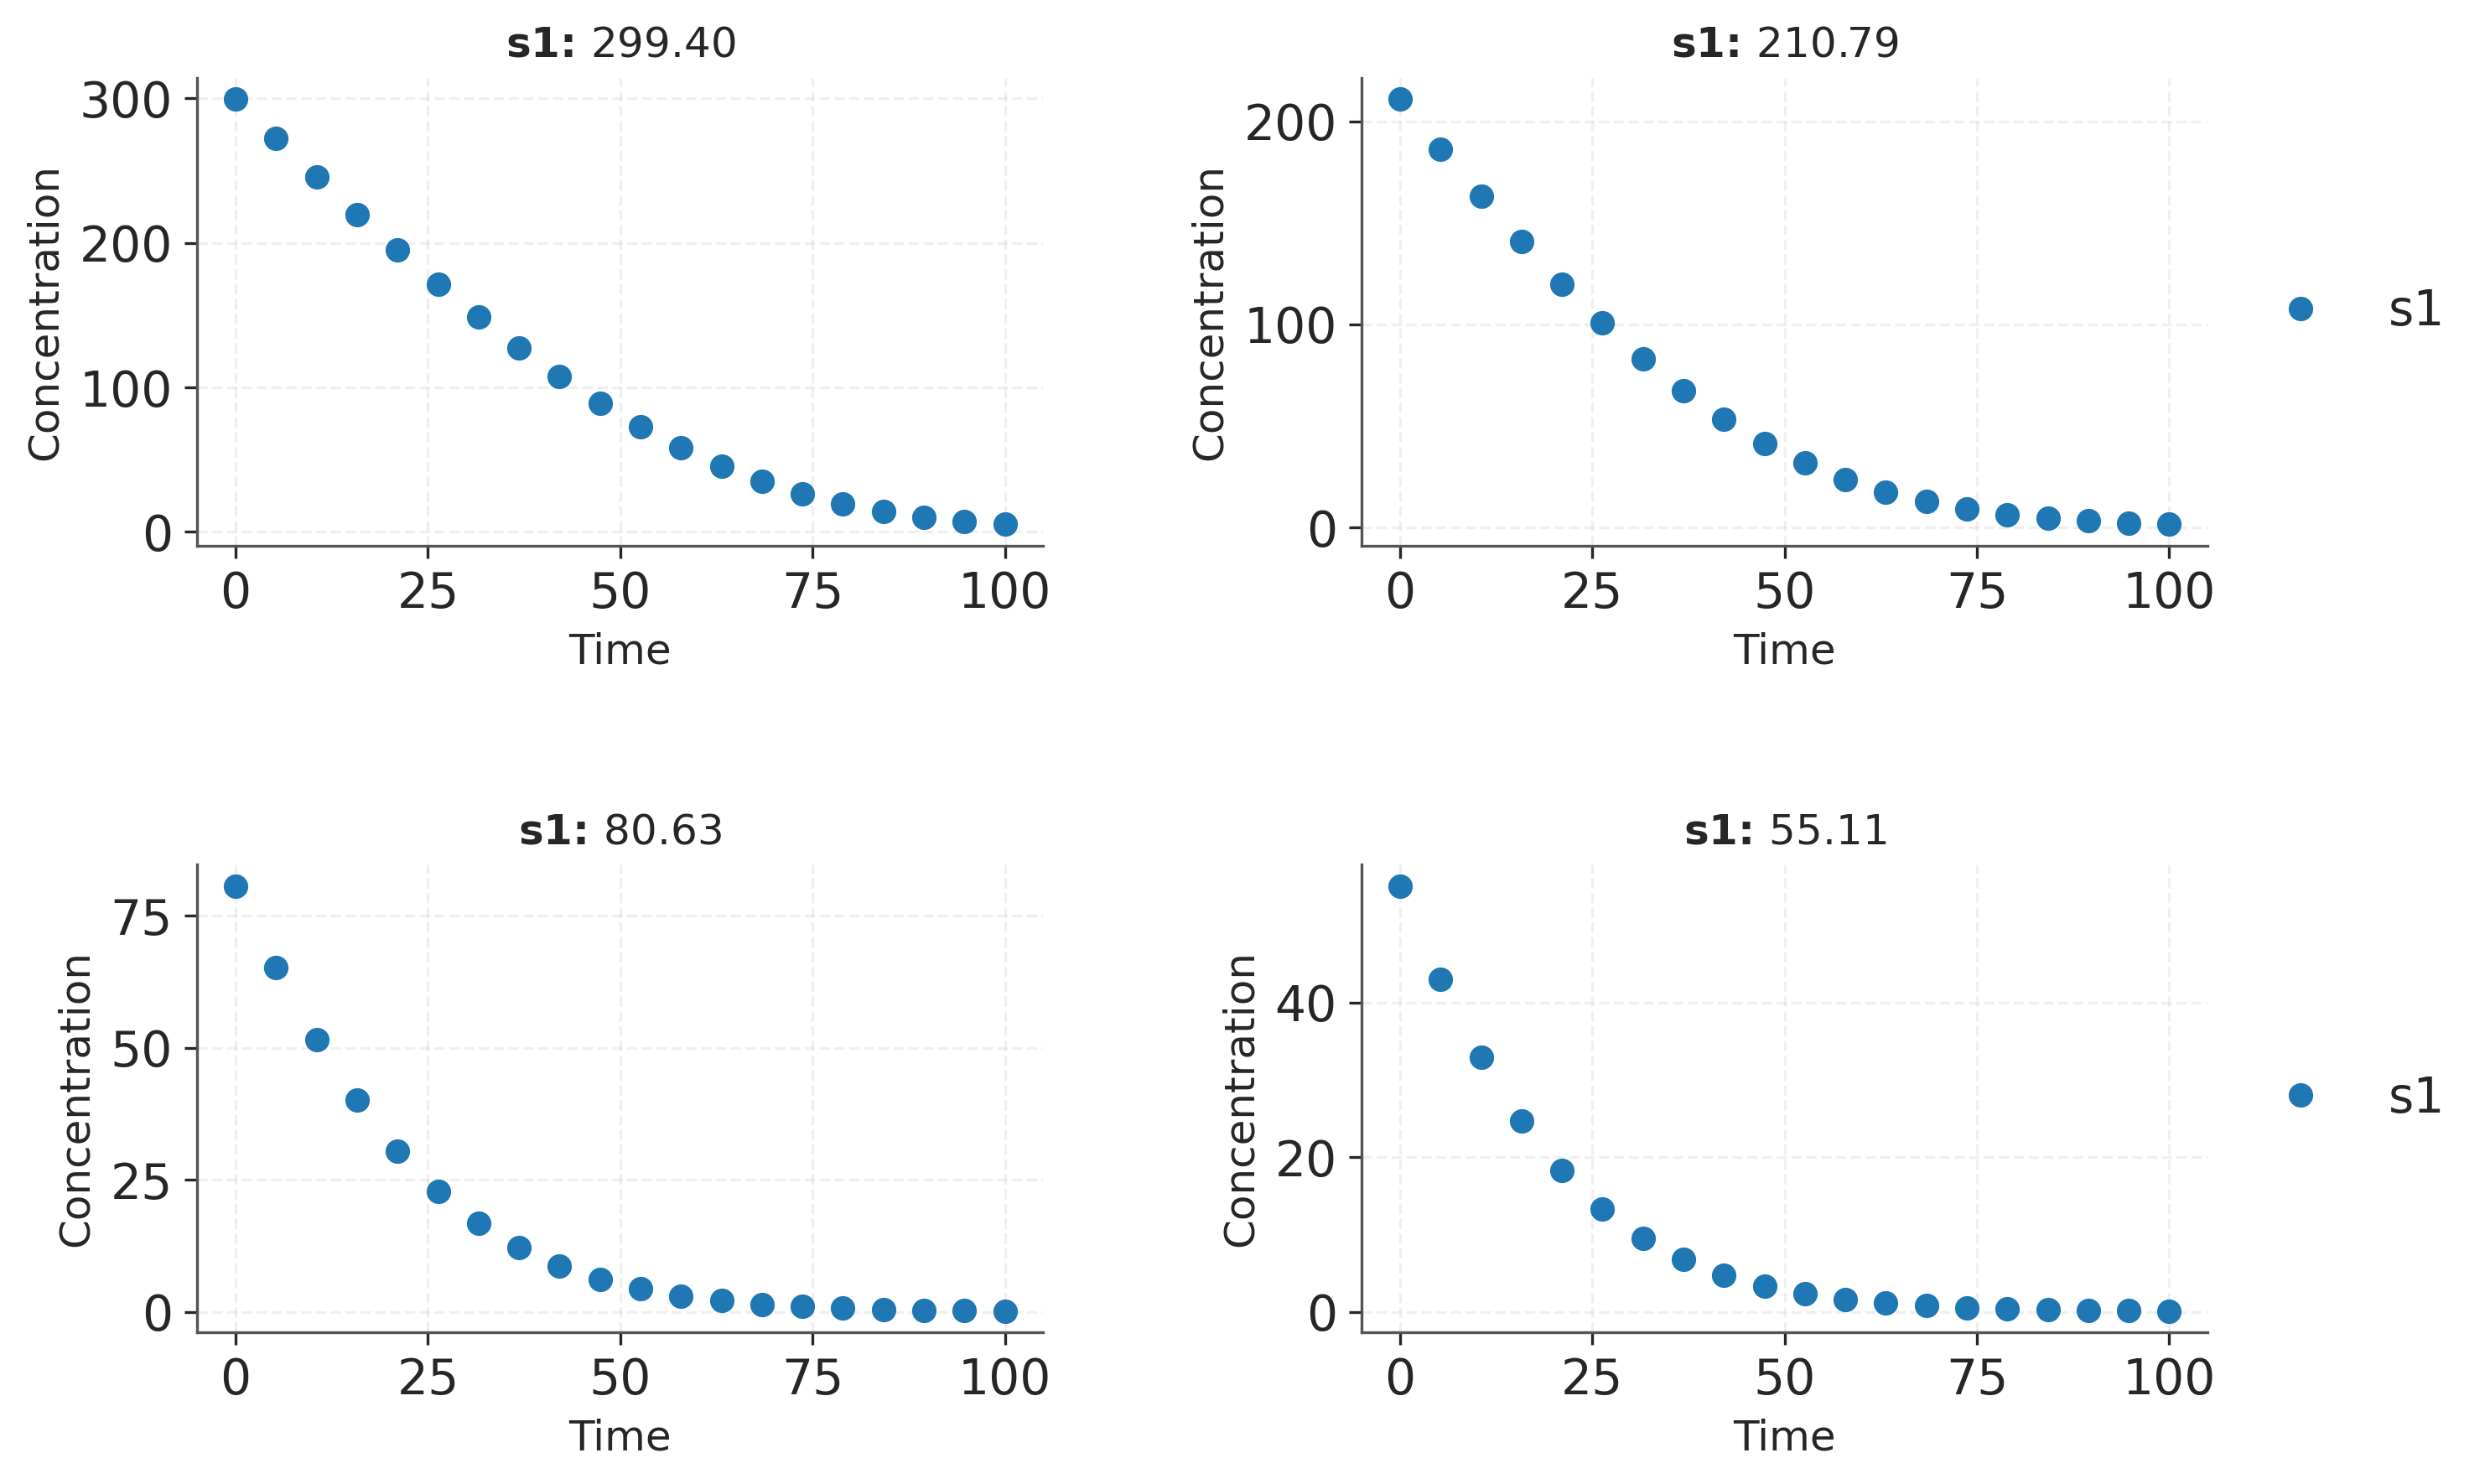

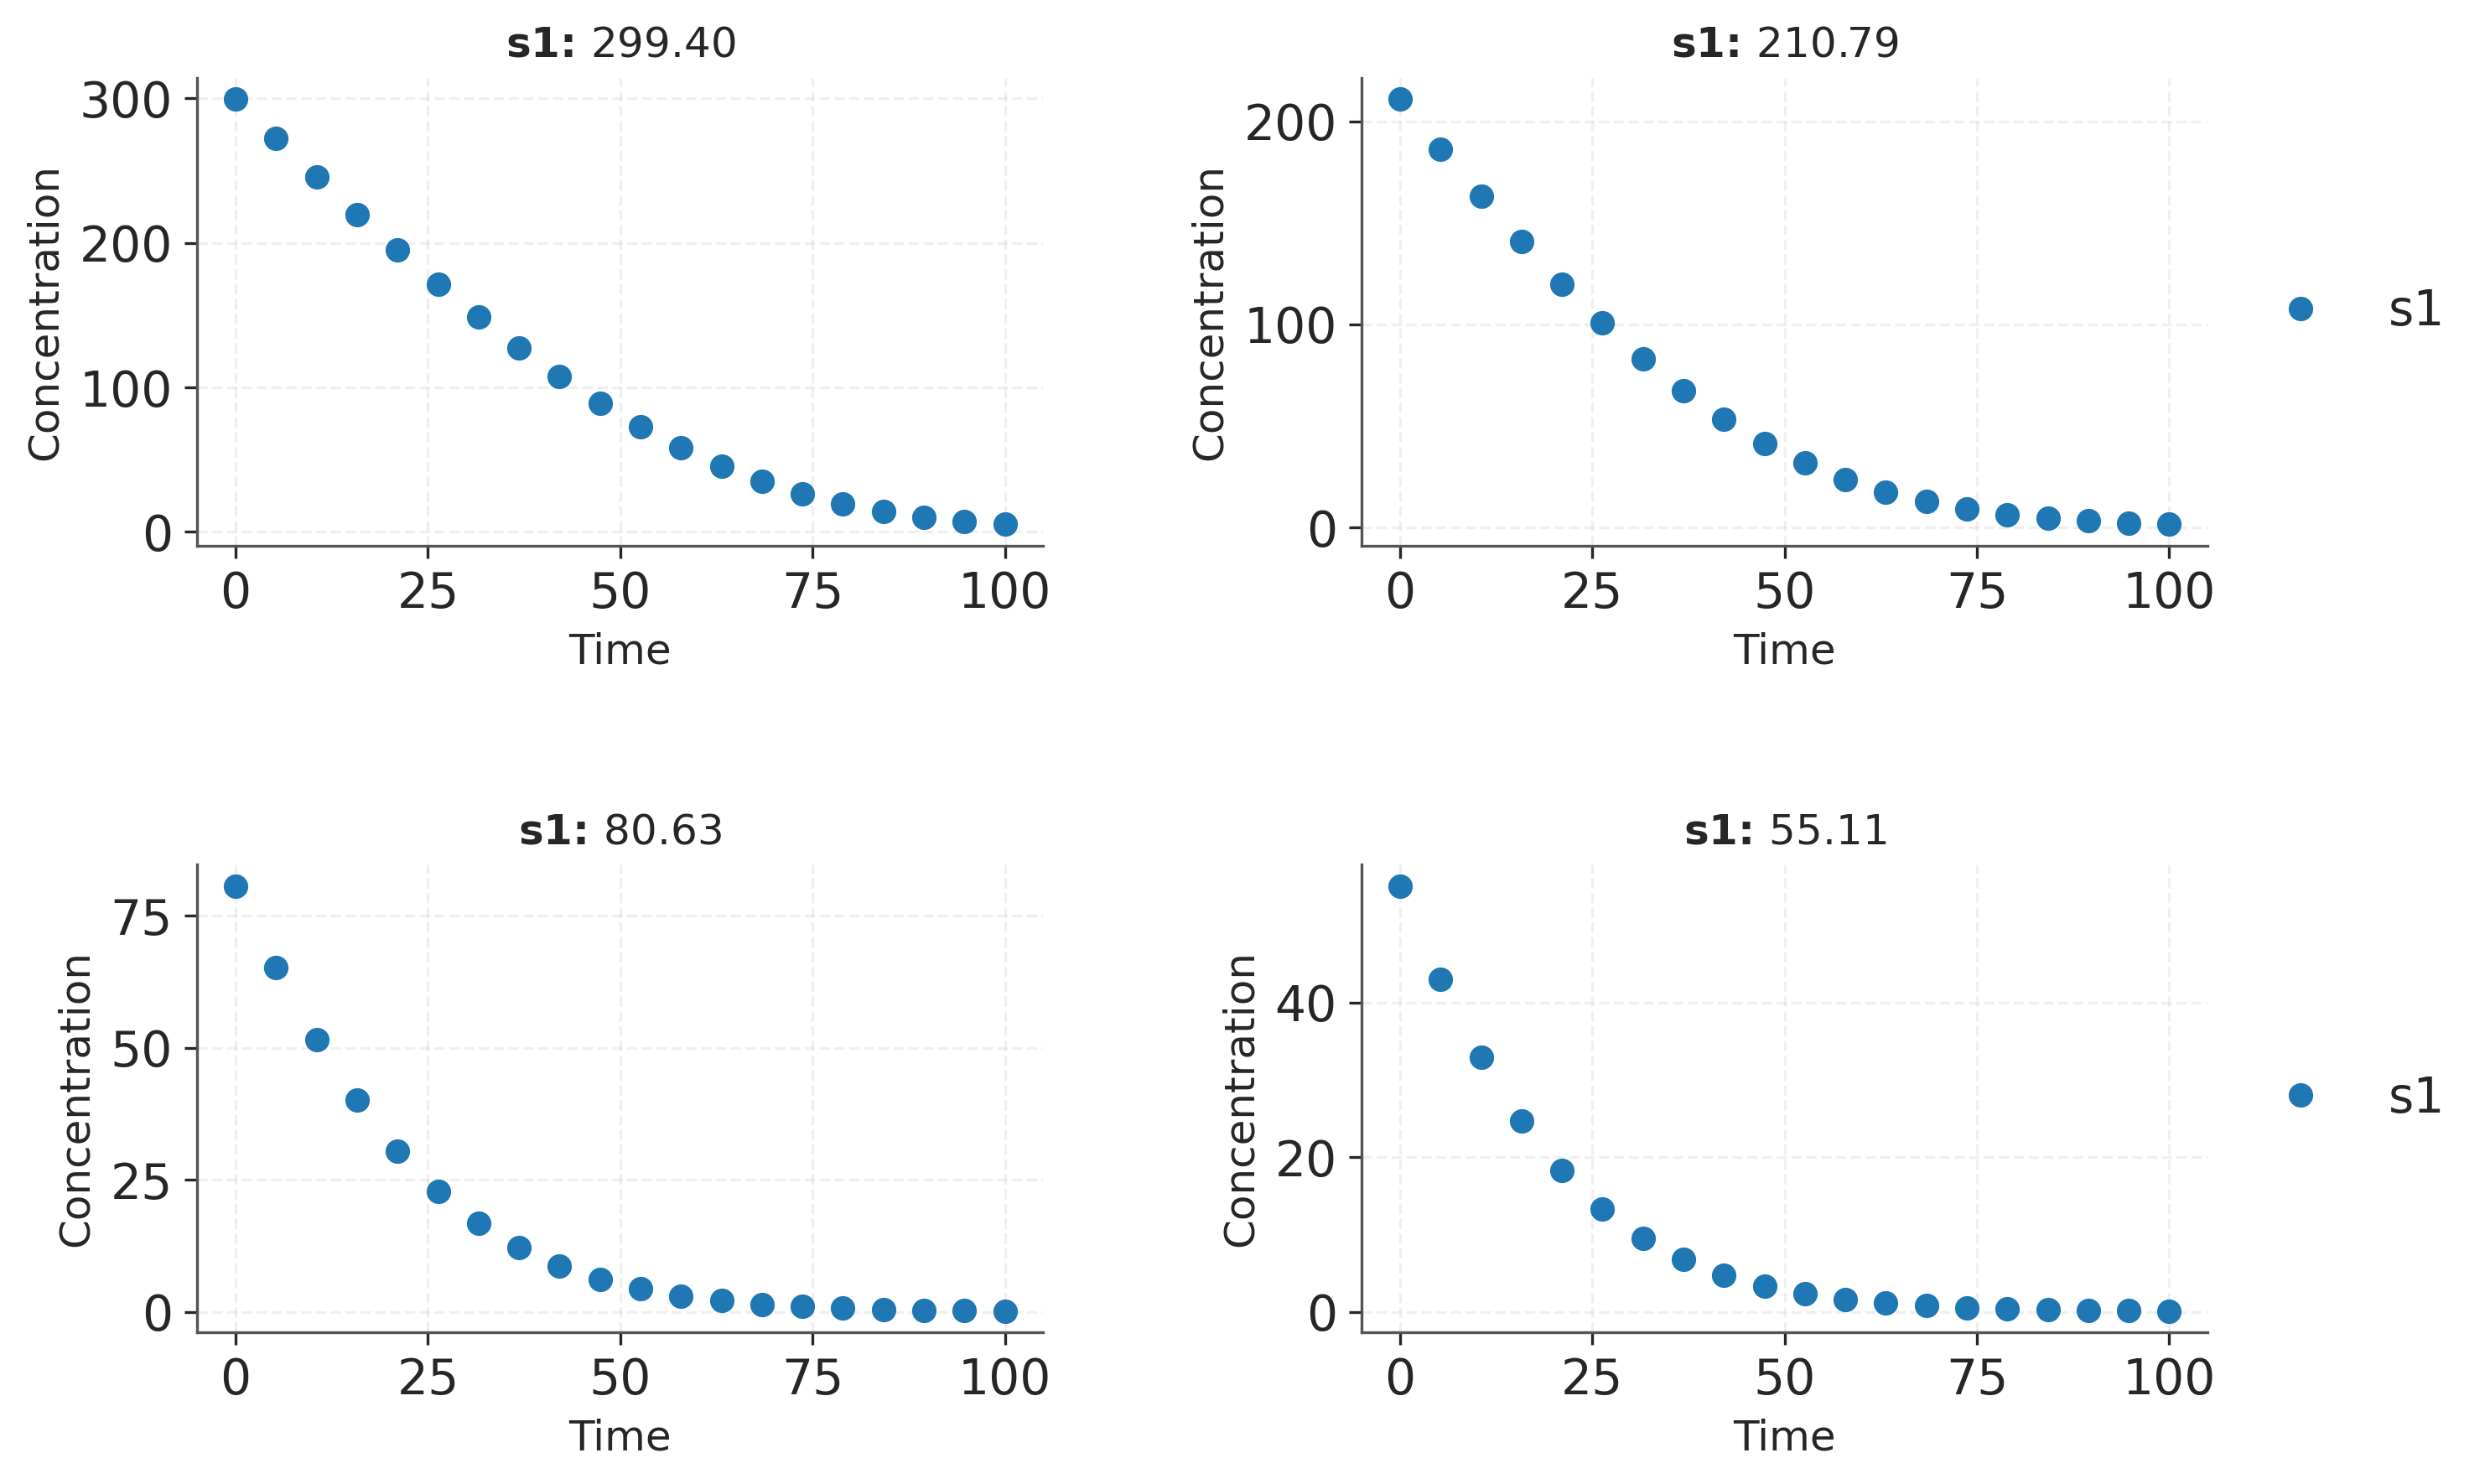

In [4]:
dataset = ctx.Dataset.from_croissant("./dataset/dataset.zip")
dataset.plot(measurement_ids=[m.id for m in dataset.measurements[0:4]])

In [5]:
# In order to perform optimization, we need to add initial values.
model.parameters.v_max.initial_value = 10.0
model.parameters.K_m.initial_value = 120.0

# ... and to make sure to be as realistic as possible.
model.parameters.v_max.value = None
model.parameters.K_m.value = None

In [6]:
# Perform the optimization
result, new_model = ctx.optimize(
    model=model,
    dataset=dataset,
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="lbfgs"
)

<lmfit.minimizer.MinimizerResult object at 0x3454e08d0>

/Users/janrange/GitHub/Catalax/catalax/dataset/dataset.py:549: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=4, h_pad=4)


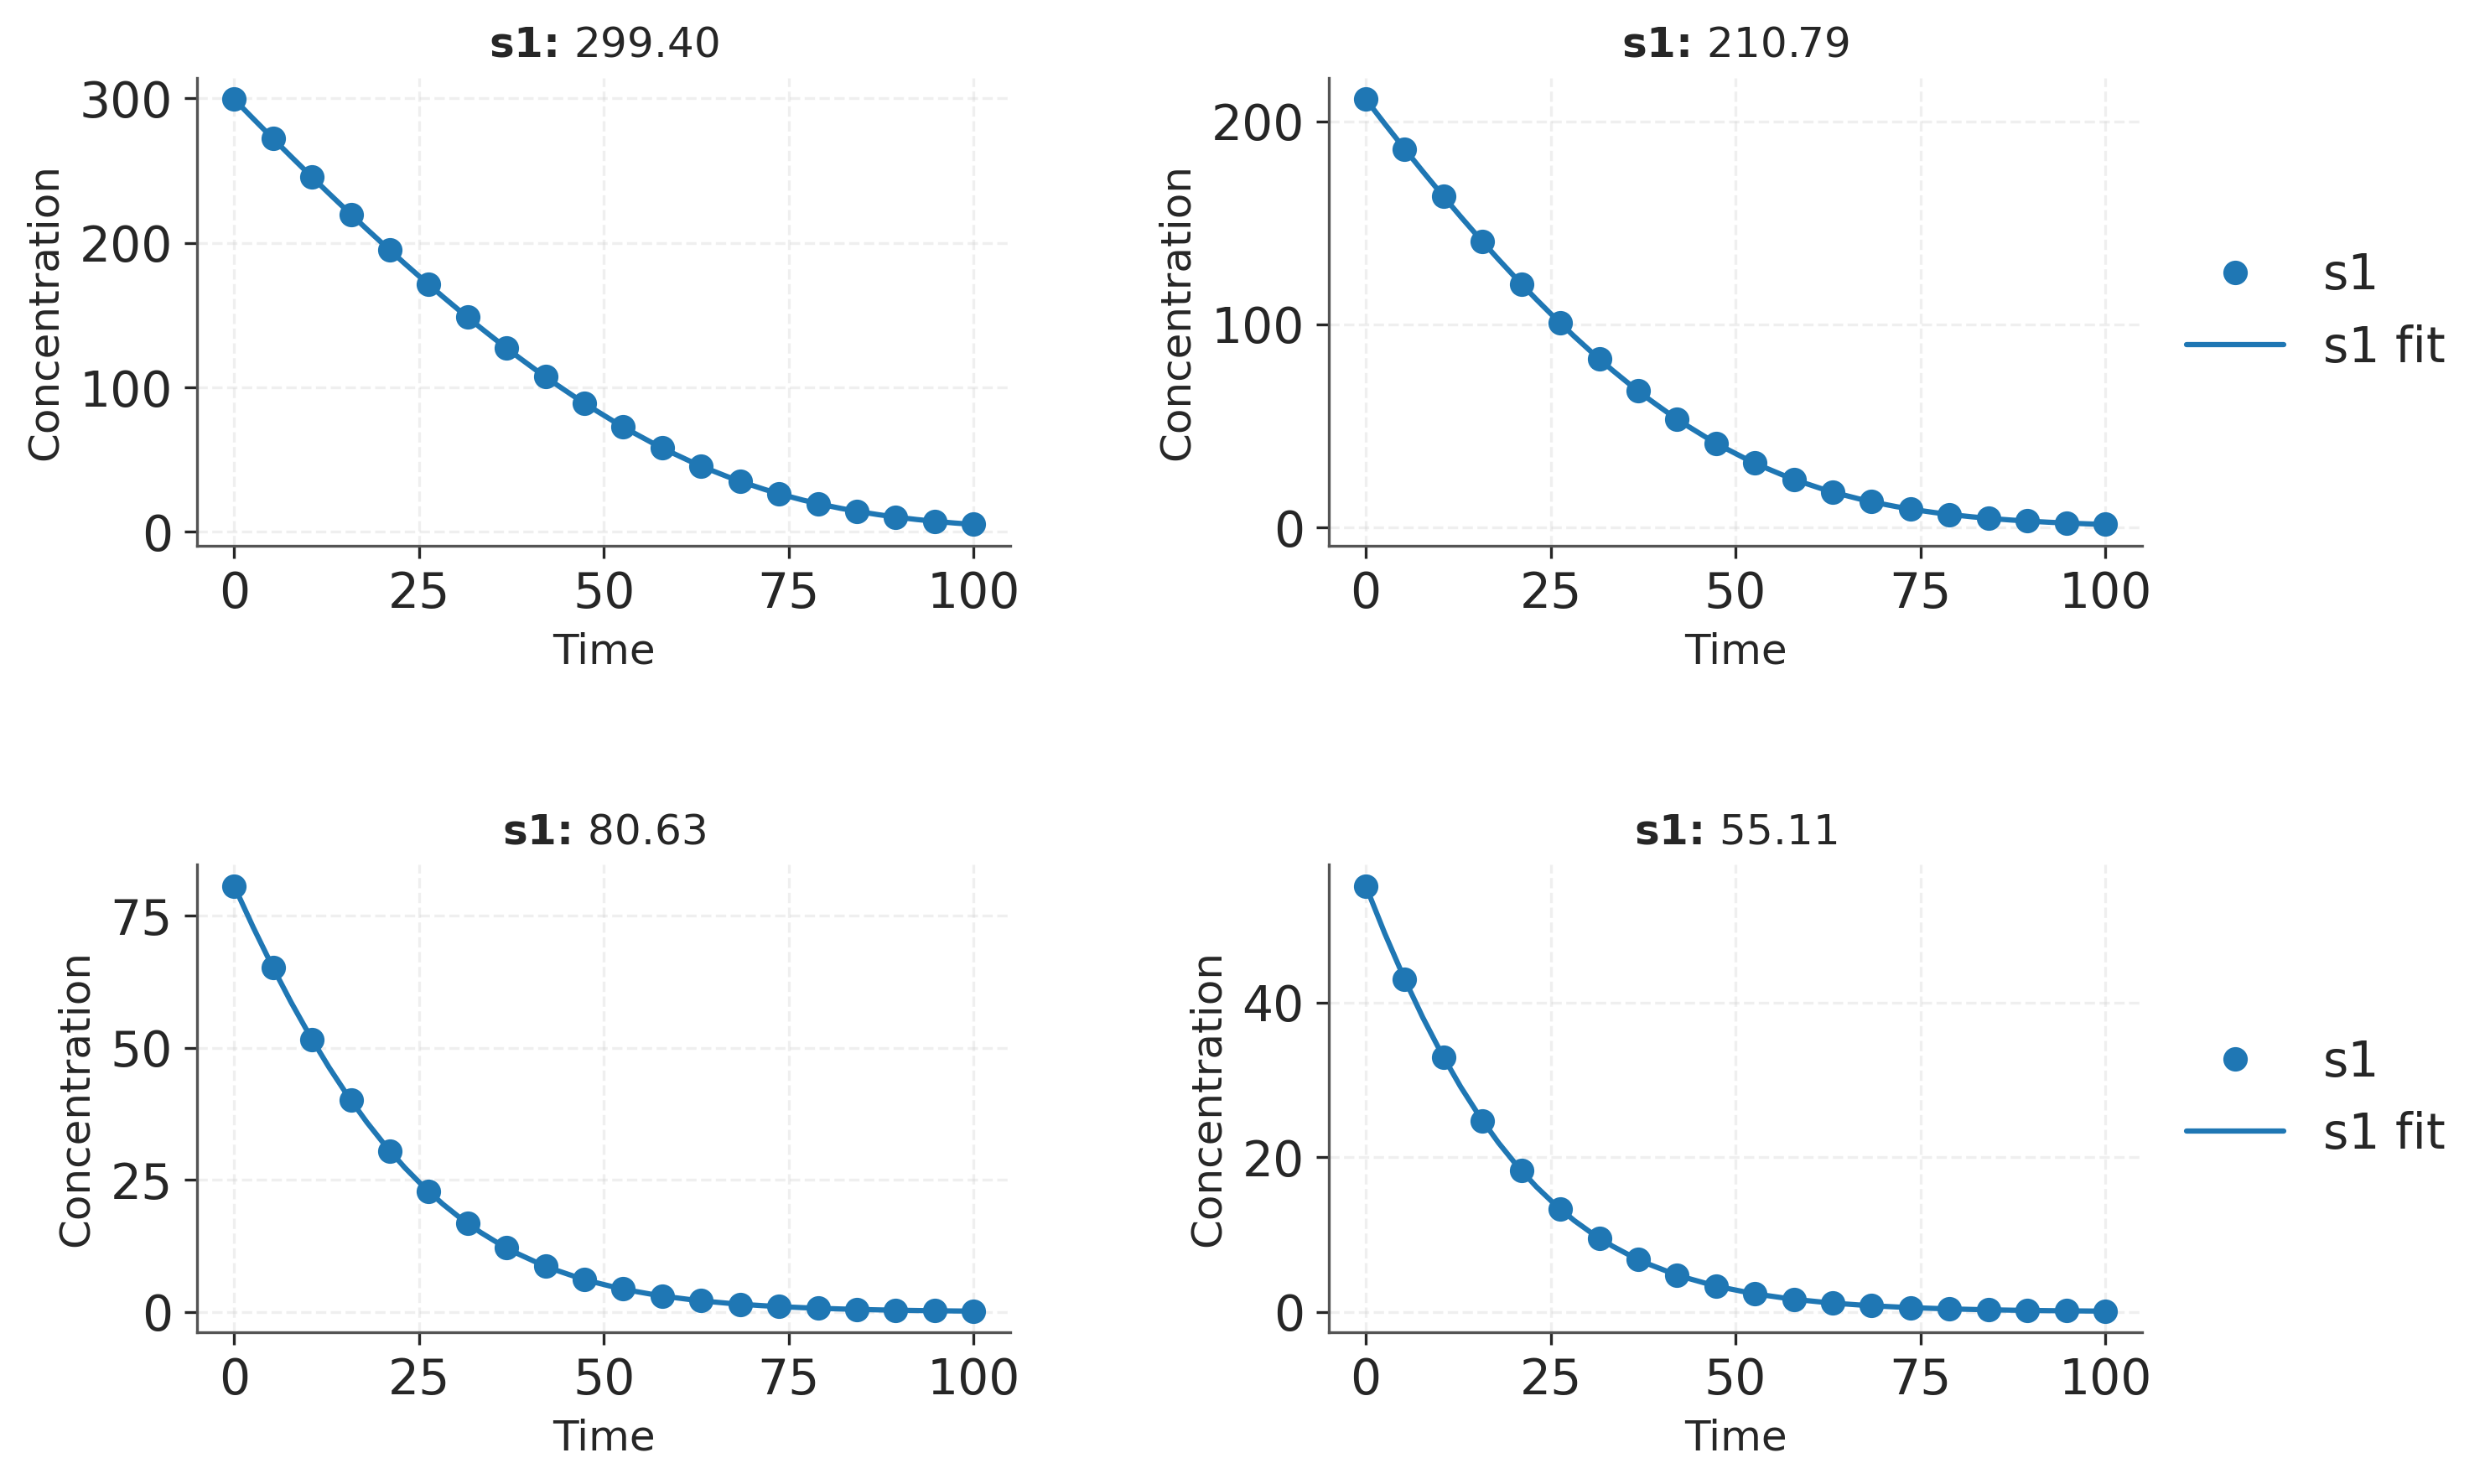

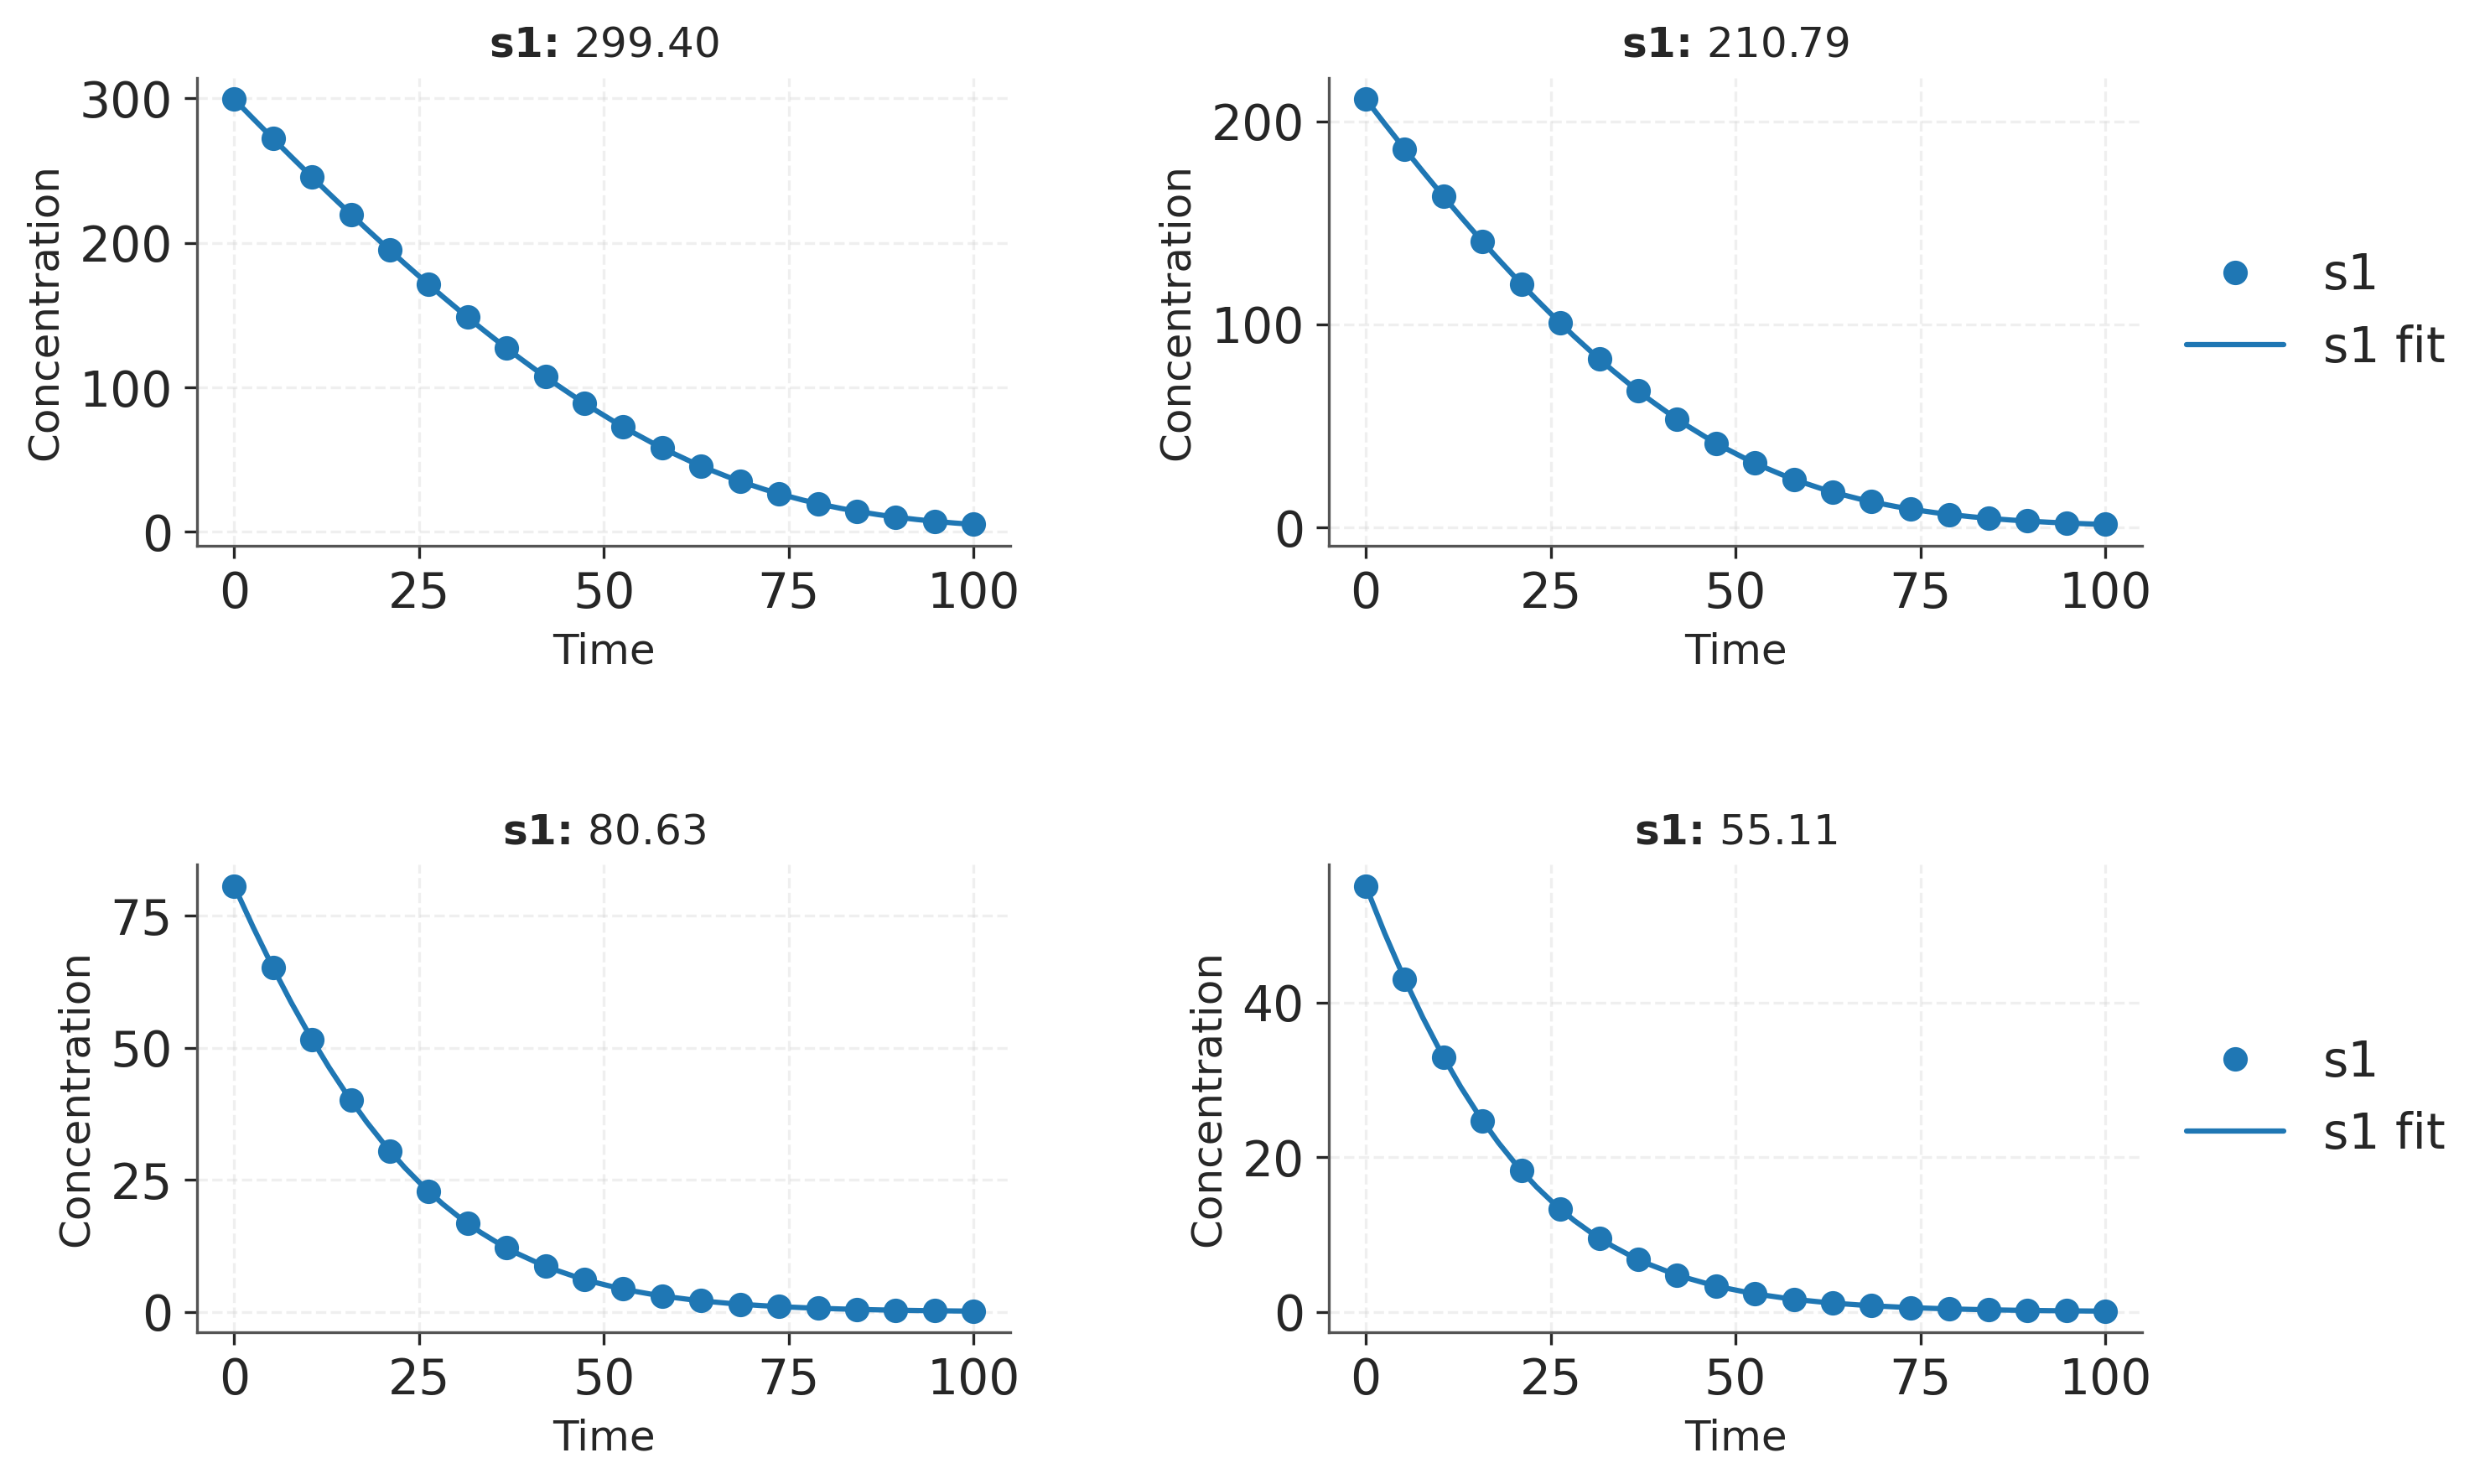

In [7]:
dataset.plot(model=new_model, measurement_ids=[m.id for m in dataset.measurements[0:4]])